In [1]:
#Cargar toda las librerias que estoy usando
import pandas as pd
import numpy as np
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
!pip install --upgrade mplfinance 
import mplfinance as mpf
import seaborn as sns

C:\Users\Lenovo\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


  Attempting uninstall: mplfinance
    Found existing installation: mplfinance 0.12.9b0
    Uninstalling mplfinance-0.12.9b0:
      Successfully uninstalled mplfinance-0.12.9b0


In [ ]:
###############################################################################################################################################

In [4]:
# Ejercicio 1 
# 1.1 Cargo fichero del enunciado en pandas
# Leer fichero

df_1 = pd.read_csv('IVE_tickbidask.txt', 
            names = ['dia', 'tiempo', 'precio', 'bid', 'ask', 'volumen'])

#elimino los NaN si alguno tiene NAN 
df_1 = df_1.dropna()
# compruebo que no hay NaNs
df_1.isna().sum().sum()

0

In [5]:
# 1.2 Dado que el fichero de datos es muy grande, trabaja solo una parte del mismo
df_2 = df_1.iloc[:500000,]

In [6]:
#1.3 En un nuevo df, creo una nueva columna dia_tiempo
df_3 = pd.DataFrame(df_2, columns = ['dia_tiempo'])
df_3 = df_2.dia + ' ' + df_2.tiempo
str(df_3)

'0         09/28/2009 09:30:00\n1         09/28/2009 09:30:00\n2         09/28/2009 09:31:32\n3         09/28/2009 09:31:32\n4         09/28/2009 09:31:33\n                 ...         \n499995    08/25/2010 11:07:21\n499996    08/25/2010 11:07:21\n499997    08/25/2010 11:07:21\n499998    08/25/2010 11:07:21\n499999    08/25/2010 11:07:33\nLength: 500000, dtype: object'

In [7]:
# 1.4 Para que el índice sea el día en formato de tiempo DatetimeIndex
df_3 = pd.DataFrame(df_2, columns = ['dia_tiempo'])
df_3 = df_2.dia + ' ' + df_2.tiempo
str(df_3)
df_4 = pd.concat([df_2,df_3],axis = 1)
df_4.columns = ([ 'dia' , 'tiempo' , 'precio' , 'bid' , 
    'ask' , 'volumen' , 'dia_tiempo' ])
df_5 = pd.DataFrame(df_4, columns = [ 'dia' , 'tiempo' , 'precio' , 
    'volumen' , 'dia_tiempo' ])
df_5.index = df_5.dia_tiempo

#combierto el indice a variable temporal
df_5.index = pd.to_datetime(df_5.index)

#df_5 es con el que voy a trabajar a partir de ahora

In [ ]:
###################################################################################################################################################################

In [8]:
#2 y 3. Calcula las velas a la hora y haz un grafico
# 2.1 Velas horarias en df_hour_candle_2
df_hour_candle = df_5.precio.resample('H').ohlc()
df_hour_candle_2 = df_hour_candle.dropna()
df_hour_candle_2

,open,high,low,close
dia_tiempo,,,,
2009-09-28 09:00:00,50.7900,51.150,50.7100,51.1200
2009-09-28 10:00:00,51.1500,51.380,51.1500,51.2900
2009-09-28 11:00:00,51.2891,51.440,51.2891,51.4073
2009-09-28 12:00:00,51.4100,51.510,51.4100,51.4180
2009-09-28 13:00:00,51.4200,51.600,51.4104,51.4800
...,...,...,...,...
2010-08-24 16:00:00,50.7600,50.760,50.7600,50.7600
2010-08-24 17:00:00,50.5500,50.580,50.5500,50.5500
2010-08-25 09:00:00,50.4700,50.570,50.1900,50.2700


(<Figure size 720x504 with 1 Axes>, <AxesSubplot:>)

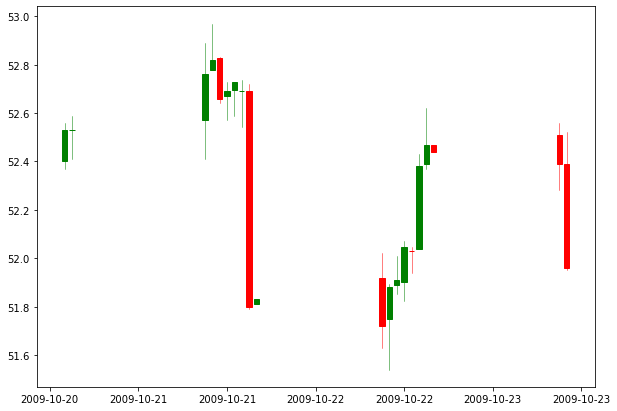

In [7]:
# 3.1 Graficar las velas horarias.
# He escogido un periodo cualquiera. Por ejemplo 
# df_hour_candle_2.iloc[130:150,:] usando el ejemplo de los apuntes

def plot_candle(df, width = .5, figsize = (10, 7), tick_formater = '%Y-%m-%d'):        
    m_data = df[['open', 'high', 'low', 'close']].values
    days_m_dates_format = mdates.date2num(df.index.values) 
    data_plot = np.column_stack((days_m_dates_format, m_data))
        
    fig, ax = plt.subplots(figsize=figsize)
    _ = candlestick_ohlc(ax,
                         data_plot,
                         width = width,
                         colorup = 'green',
                         colordown = 'red')
    _ = ax.xaxis.set_major_formatter(mdates.DateFormatter(tick_formater))
    return fig, ax

plot_candle(df_hour_candle_2.iloc[130:150,:], width = 0.03)

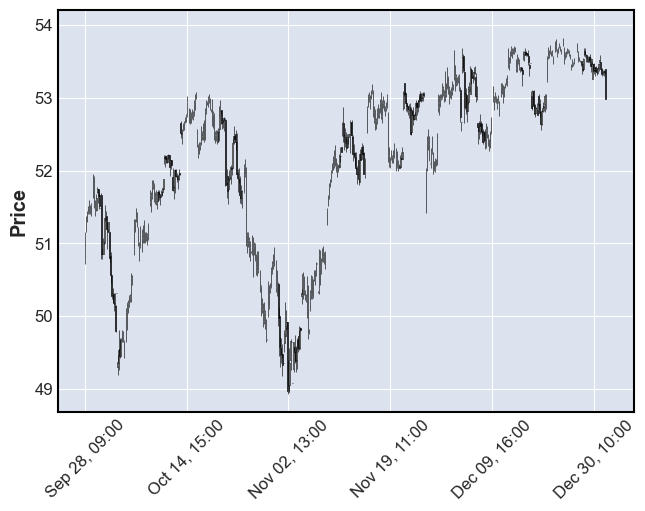

In [9]:
#3.1. Una segunda forma de graficar
mpf.plot(df_hour_candle_2.loc['2009'], type = 'candle')

In [11]:
#2 y 3. Calcula las velas al dia y haz un grafico
# 2.2 Velas diarias en df_day_candle_2
df_day_candle = df_5.precio.resample('D').ohlc()
df_day_candle_2 = df_day_candle.dropna()
df_day_candle_2

,open,high,low,close
dia_tiempo,,,,
2009-09-28,50.79,51.60,50.71,51.5400
2009-09-29,51.78,51.96,51.37,51.4900
2009-09-30,51.66,51.69,50.78,51.2900
2009-10-01,51.16,51.16,49.78,50.3166
2009-10-02,49.30,49.81,49.19,49.5100
...,...,...,...,...
2010-08-19,52.47,52.58,51.59,51.7800
2010-08-20,51.64,51.67,51.18,51.5500
2010-08-23,51.88,52.05,51.33,51.3300


(<Figure size 1000x700 with 1 Axes>, <AxesSubplot:>)

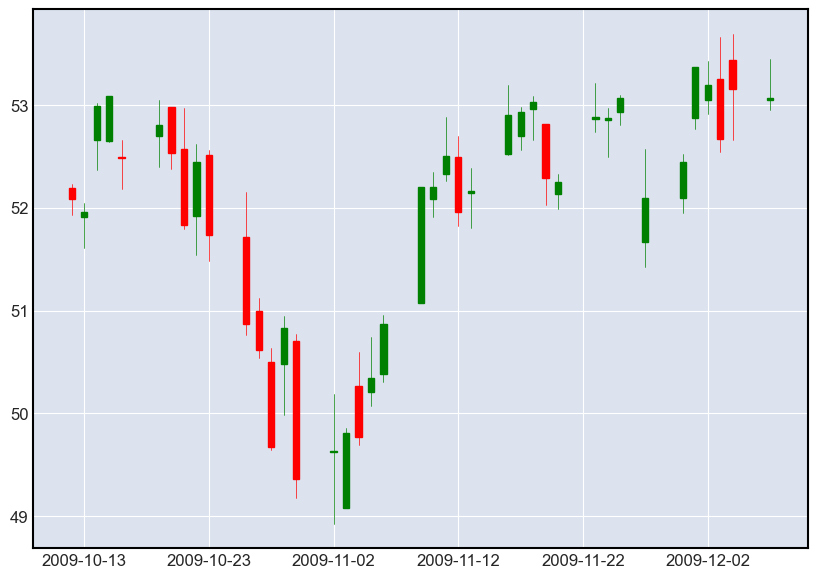

In [12]:
# 3.2 Graficar las velas diarias.
# He escogido un periodo cualquiera. Por ejemplo df_day_candle_2.iloc[10:50,:]
# usando el ejemplo de los apuntes

def plot_candle(df, width = .5, figsize = (10, 7), tick_formater = '%Y-%m-%d'):        
    m_data = df[['open', 'high', 'low', 'close']].values
    days_m_dates_format = mdates.date2num(df.index.values) 
    data_plot = np.column_stack((days_m_dates_format, m_data))
        
    fig, ax = plt.subplots(figsize = figsize)
    _ = candlestick_ohlc(ax,
                         data_plot,
                         width = width,
                         colorup = 'green',
                         colordown = 'red')
    _ = ax.xaxis.set_major_formatter(mdates.DateFormatter(tick_formater))
    return fig, ax

plot_candle(df_day_candle_2.iloc[10:50,:], width = 0.5)

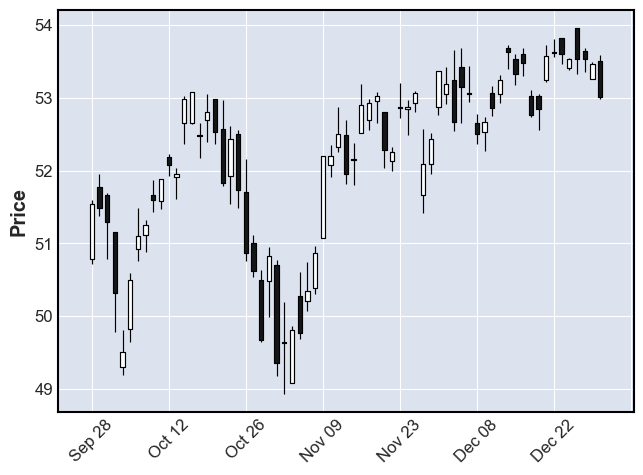

In [13]:
#3.2. Una segunda forma de graficar
mpf.plot(df_day_candle_2.loc['2009'], type = 'candle')

In [14]:
#2 y 3. Calcula las velas mensuales y haz un grafico
# 2.3 Velas mensuales en df_month_candle_2
df_month_candle = df_5.precio.resample('MS').ohlc()
df_month_candle_2 = df_month_candle.dropna()
df_month_candle_2

,open,high,low,close
dia_tiempo,,,,
2009-09-01,50.79,51.9600,50.7100,51.2900
2009-10-01,51.16,53.0822,49.1800,49.3602
2009-11-01,49.63,53.2100,48.9300,52.4400
2009-12-01,52.87,53.9600,52.2700,53.0100
2010-01-01,53.55,55.1790,51.8400,51.8900
2010-02-01,52.51,53.6400,50.2410,53.2600
2010-03-01,53.54,57.1100,53.5000,56.4600
2010-04-01,56.91,59.1000,56.6100,57.5600
2010-05-01,57.87,58.4700,0.1100,53.0400


(<Figure size 1000x700 with 1 Axes>, <AxesSubplot:>)

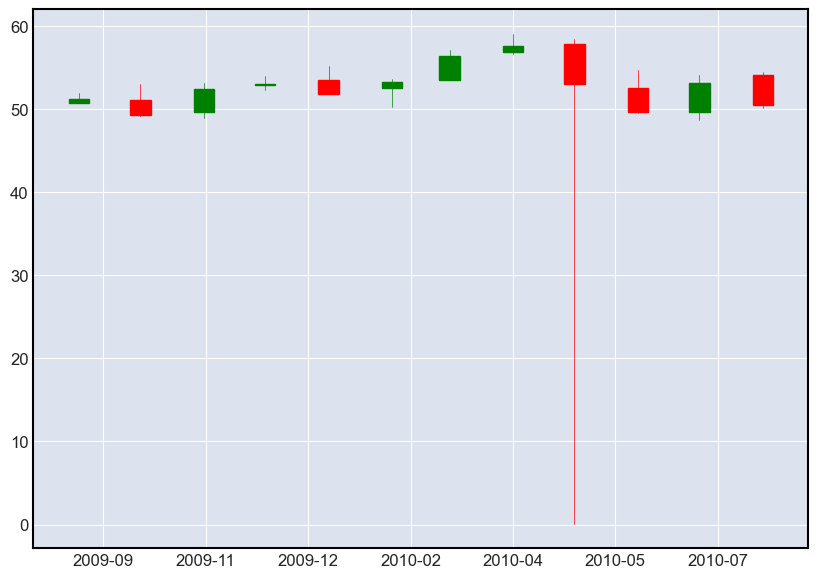

In [15]:
# 3.3 Graficar las velas mensuales.
# Tengo que coger todo el periodo de muestreo
# usando el ejemplo de los apuntes

def plot_candle(df, width = .5, figsize = (10, 7), tick_formater = '%Y-%m'):        
    m_data = df[['open', 'high', 'low', 'close']].values
    days_m_dates_format = mdates.date2num(df.index.values) 
    data_plot = np.column_stack((days_m_dates_format, m_data))
        
    fig, ax = plt.subplots(figsize=figsize)
    _ = candlestick_ohlc(ax,
                         data_plot,
                         width=width,
                         colorup='green',
                         colordown='red')
    _ = ax.xaxis.set_major_formatter(mdates.DateFormatter(tick_formater))
    return fig, ax

plot_candle(df_month_candle_2, width = 10)

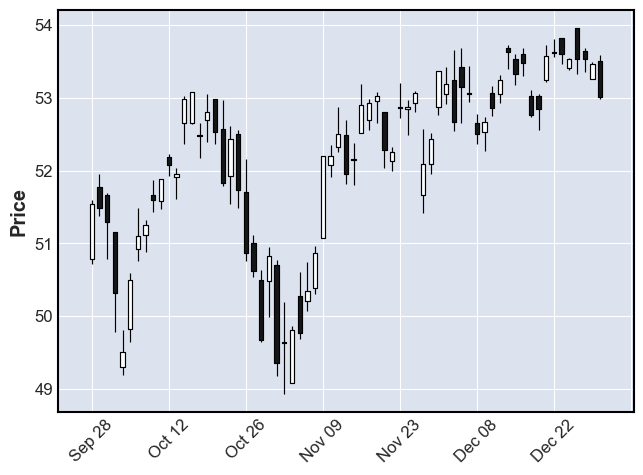

In [16]:
#3.3. Una segunda forma de graficar
mpf.plot(df_day_candle_2.loc['2009'], type = 'candle')

In [17]:
#2 y 3. Calcula las velas anuales y haz un grafico
# 2.4 Velas mensuales en df_year_candle_2
df_year_candle = df_5.precio.resample('YS').ohlc()
df_year_candle_2 = df_year_candle.dropna()
df_year_candle_2

,open,high,low,close
dia_tiempo,,,,
2009-01-01,50.79,53.96,48.93,53.01
2010-01-01,53.55,59.10,0.11,50.49


(<Figure size 1000x700 with 1 Axes>, <AxesSubplot:>)

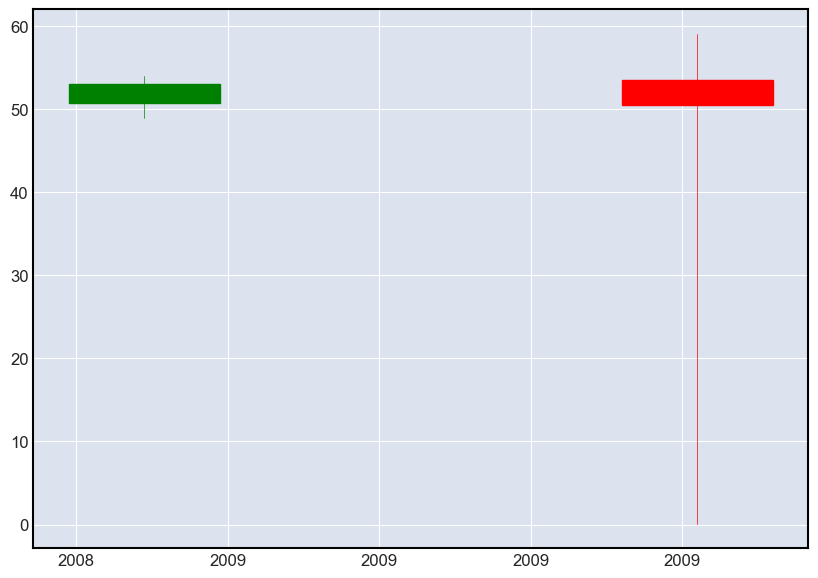

In [18]:
# 3.4 Graficar las velas anuales.
# Tengo que coger todo el periodo de muestreo
# usando el ejemplo de los apuntes

def plot_candle(df, width = .5, figsize = (10, 7), tick_formater = '%Y'):        
    m_data = df[['open', 'high', 'low', 'close']].values
    days_m_dates_format = mdates.date2num(df.index.values) 
    data_plot = np.column_stack((days_m_dates_format, m_data))
        
    fig, ax = plt.subplots(figsize = figsize)
    _ = candlestick_ohlc(ax,
                         data_plot,
                         width = width,
                         colorup = 'green',
                         colordown = 'red')
    _ = ax.xaxis.set_major_formatter(mdates.DateFormatter(tick_formater))
    return fig, ax

plot_candle(df_year_candle, width = 100)

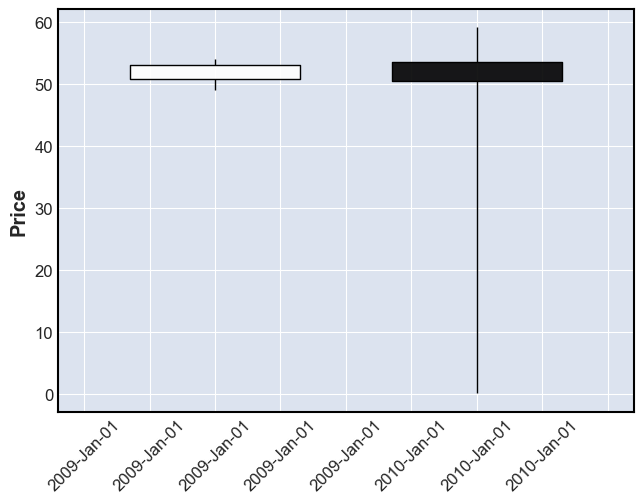

In [19]:
#3.4. Una segunda forma de graficar
mpf.plot(df_year_candle, type = 'candle')

In [ ]:
####################################################################################

[50.06, 51.7, 52.958, 51.91, 50.8, 50.0, 50.53, 52.11, 52.76, 53.02, 52.91, 53.67, 53.75, 54.67, 54.35, 52.68, 53.22, 51.37, 52.15, 53.03, 54.14, 55.34, 56.15, 56.58, 57.2819, 57.753, 57.97, 57.47, 56.89, 54.94, 55.93, 55.46, 55.38, 52.7, 52.1894, 52.83, 52.91, 50.86, 52.61, 54.62, 52.02, 49.41, 51.91, 52.09, 52.01, 53.77, 54.15, 53.76, 52.8]


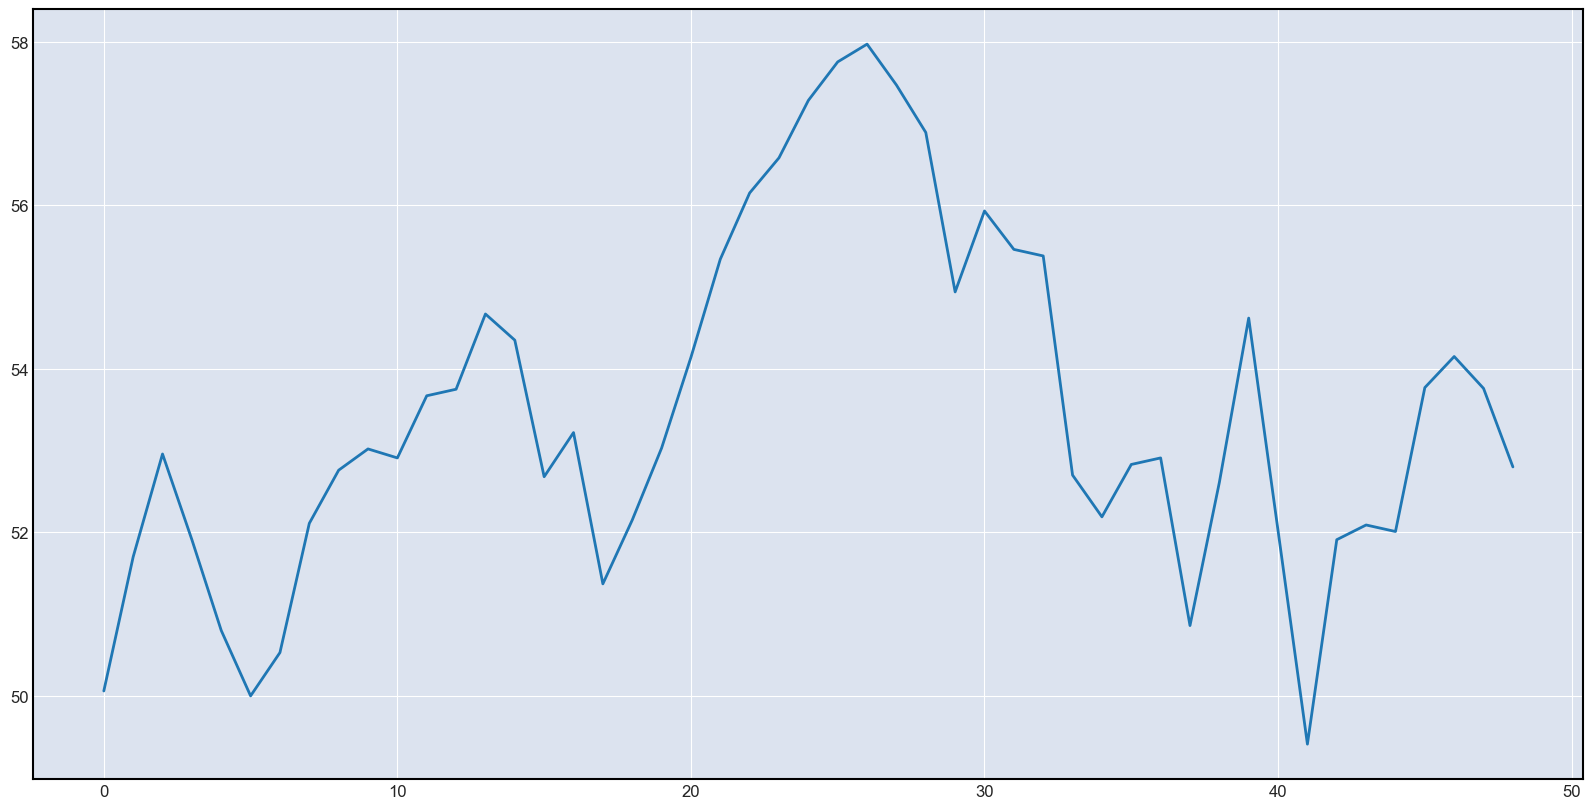

In [20]:
# Punto 4
# Haz una función que muestre el precio (df_5.precio) cada vez 
# que se negocia una cantidad de negociaciones, 
# por parámetro Ticks bars.
# Prueba la función con 1000 negociaciones.
# Realiza una figura


# 4.1 Definir función
def precio_al_n_negociaciones(n_negociaciones):
    # 4.1.1 Cuantos valores me va a salir en el lista de salida e
    # inicializo lista de salida
    iteraciones = len(df_5.precio)//n_negociaciones
    lista_n_n = list(range(1,iteraciones))
    
    # 4.1.2 empezando desde 0; pq numero filas empieza en cero
    # luego al 999, luego al 1999, etc.
    # Y saco valor en df_5.precio de esa negociación en lista lista_n_n
    for i in range(1,iteraciones):
        lista_n_n[i - 1] = df_5.precio.iloc[(i * n_negociaciones) - 1]
    return lista_n_n

# 4.2 Llamo a función com 1000 negociaciones y que salga en pantalla
# se pone cuantos negociaciones ha de pasar y devuelve el precio 
# de ese día.
resultado = precio_al_n_negociaciones(10000) 
print(resultado)


# 4.3 Grafico la lista de salida
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(resultado)

In [ ]:
#####################################################################################################################################################

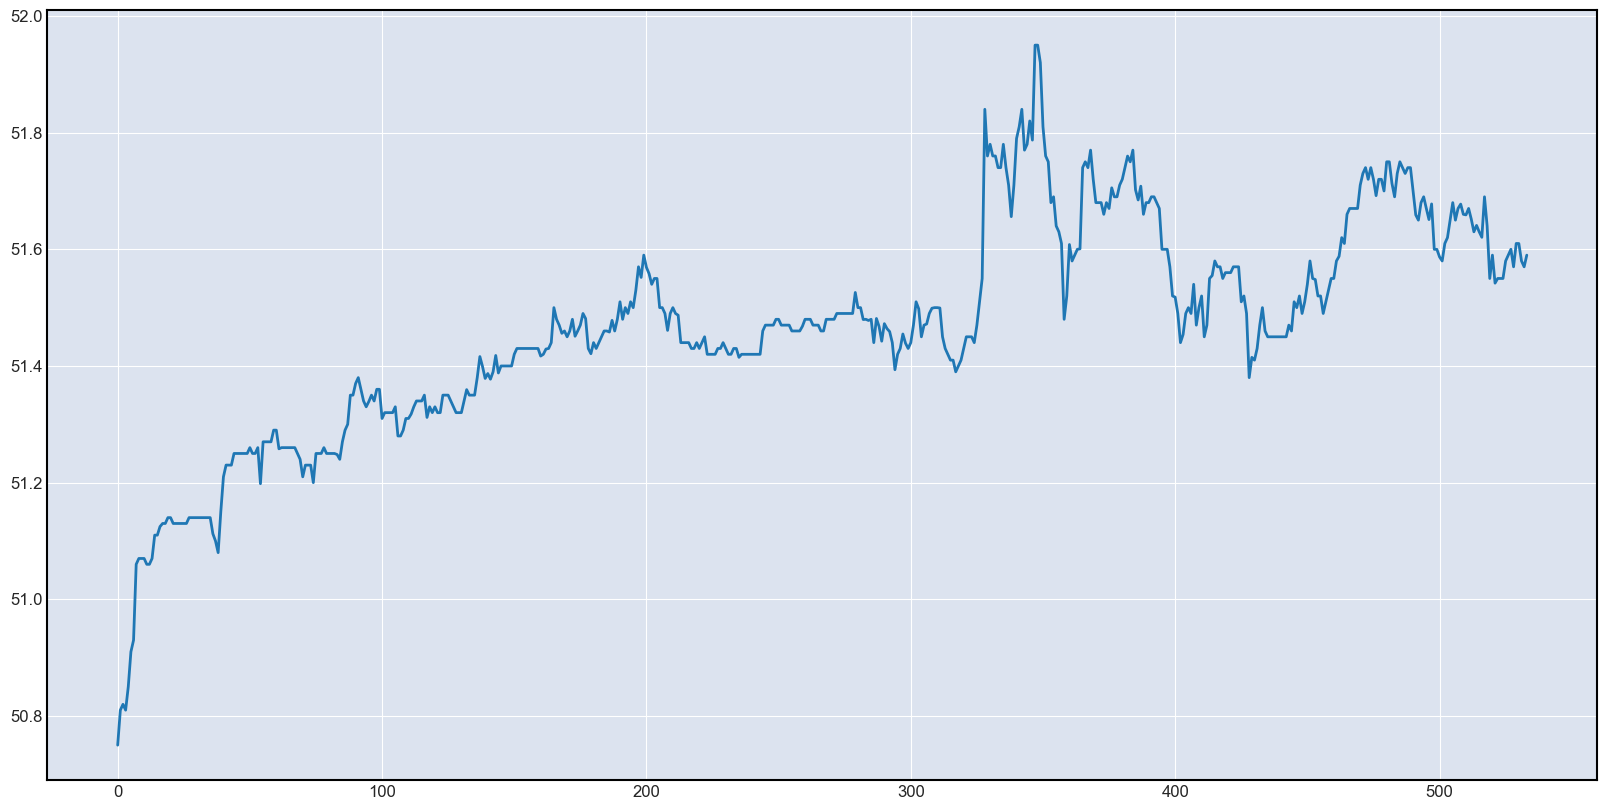

In [21]:
# Punto 5
# Haz una funcion que muestre el precio (df_5.precio) cada vez que 
# se negocia una cantidad de dolares (df_5.precio * df_5.volumen) , 
# por parametro. Dollas bars.
# Prueba la funcion con 100000 dolares.
# Realiza una figura


# 5.1 Definir función
# Cada vez que supera el acumulado de la multiplicación de precio 
# por volumen, empezando en fila 0 a el valor n_dollares_negociados. 
# Entonces acumulado vuelve a 0 y # pasa el valor del precio a la lista 
# de resultados.
# Para “cuantas negociaciones maximas.”, he tenido que añadir un parámetro 
# más pq las 500000 tenia un montón de valores que salta con 
# 100.000 dolares y con 1.000.000 dolares
def dolares_negociados(n_dolares_negociados,cuantas_negociaciones):
    salida = pd.Series(range(cuantas_negociaciones))
    ac = 0    
    lista_db = list()
    for i in range(cuantas_negociaciones):
        ac = ac + df_5.precio.iloc[i] * df_5.volumen.iloc[i]
        if ac > n_dolares_negociados:
            ac = 0
            lista_db.append(df_5.precio.iloc[i])
        salida[i] = ac   
    return salida , lista_db

# 5.2 Llamo a función 100.000 dólares negociados y que salga en pantalla
# se pone cuanto dinero ha de ser negociado y devuelve el precio de 
# ese día que se alcanzo cuando se negocio esa cantidad de dólares.

salida , lista_db = dolares_negociados(100000,5000)  
#print(resultado)


# 5.3 Graficar la lista de precio cuando se alcanza
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(lista_db)
#ax.plot(salida)

In [ ]:
#########################################################################################################################################

In [22]:
# Punto 6
# Calcula los retornos diarios ( entiendo que logarítmicos)
# Pregunte al profesor. No respondió. Entiendo que lo tengo
# que decidir yo. Uso logarítmico.
# 6.1 En el caso de velas diarias uso df_day_candle_2
# los retornos logarítmicos; vistos en ejercicio 2, punto dos es:
ohlc_rl = list()
ohlc_rl = np.log(df_day_candle_2.close / df_day_candle_2.close.shift(1)) \
    .dropna()
ohlc_rl

dia_tiempo
2009-09-29   -0.000971
2009-09-30   -0.003892
2009-10-01   -0.019161
2009-10-02   -0.016160
2009-10-05    0.019676
                ...   
2010-08-19   -0.019507
2010-08-20   -0.004452
2010-08-23   -0.004277
2010-08-24   -0.015312
2010-08-25   -0.001188
Name: close, Length: 229, dtype: float64

In [23]:
# 6.2 En el caso de 10000 negociaciones uso función del 
# punto 4 precio_al_n_negociaciones.
# 6.2.1 Llamo a la función y me sale una lista con los resultados
p_n_n = precio_al_n_negociaciones(10000) 

# 6.2.2 Convierto la lista a df para usar la función que 
# me funciono en ejercicio 2, punto 2
p_n_n_df  = pd.DataFrame(p_n_n,columns = ['p_n_n'])

# 6.2.3 Aplico la función de retornos logarítmicos que me funciono 
# en ejercicio 2, punto 2
s_6_2 = np.log(p_n_n_df.p_n_n / p_n_n_df.p_n_n.shift(1)).dropna()
#s_6_2

In [24]:
# 6.3 En el caso de 1000000 dólares negociados uso función 
# del punto 5 dólares_negociados
# 6.3.1 Llamo a la función y me sale una lista con los resultados
salida , d_n = dolares_negociados(1000000,500000) 


# 6.3.2 Convierto la lista a df para usar la función que me funciono 
# en ejercicio 2, punto 2
d_n_df = pd.DataFrame(d_n,columns = ['d_n'])


# 6.3.3 Aplico la función de retornos logarítmicos que me funciono 
# en ejercicio 2, punto 2
s_6_3 = np.log(d_n_df.d_n / d_n_df.d_n.shift(1)).dropna()
#s_6_3

In [ ]:
###################################################################################################################

In [25]:
# 7.1 Haz una figura que compare los retornos diarios en los 3 casos
#Para compararlas tengo que tener el mismo numero de muestras

#Con ohlc_rl tengo 229 muestras basado en las primeras 500000 operaciones 
# de IVE_tickbidask.txt, siendo el total de operaciones 
# de IVE_tickbidask.txt de 9907691.
ohlc_rl = list()
ohlc_rl = np.log(df_day_candle_2.close / df_day_candle_2.close.shift(1)) \
    .dropna()
#ohlc_rl

# Con s_6_2 tengo 48, para poder comparar con ohlc_rl tengo que disminuir el 
# numero de operaciones de 10.000 a 2.000.
# Al hacer esta disminución de numero de operaciones a 2.000 y me sale un 
# resultado 251 con el mismo espacio temporal de el estudio ohlc_rl.
p_n_n = precio_al_n_negociaciones(2000) 
p_n_n_df = pd.DataFrame(p_n_n,columns = ['p_n_n'])
s_6_2 = np.log(p_n_n_df.p_n_n / p_n_n_df.p_n_n.shift(1)).dropna()
#s_6_2

# Con s_6_3 tengo 6023, para poder comparar con ohlc_rl tengo aumentar 
# el dinero negociado ya que prefiero qeu el tiempo sea el mismo de df_5 
# 500000 operaciones. Al aumentar el dinero negociado a 25.000.000 dólares; 
# y me sale un resultado de 251 resultados con el mismo espacio temporal 
# de el estudio ohlc_rl.

salida , d_n = dolares_negociados(25000000,500000) 
d_n_df = pd.DataFrame(d_n,columns = ['d_n'])
s_6_3 = np.log(d_n_df.d_n / d_n_df.d_n.shift(1)).dropna()
#s_6_3

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


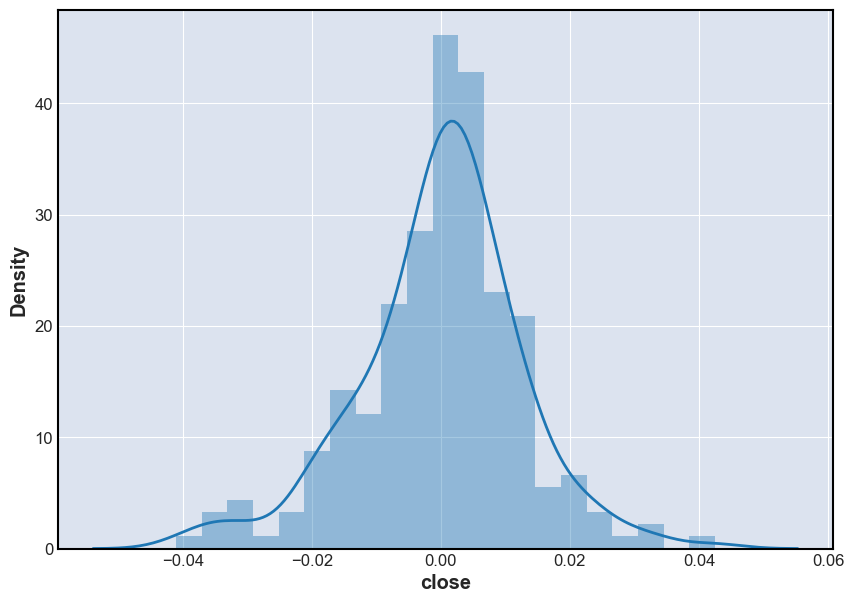

In [24]:
# Si hago como en el ejercicio 2 y aplico la grafica 
# distplot para el caso de las velas diarias; 
# se vera como es la distribucion
# Para ohlc

ohlc_rl_df = pd.DataFrame(ohlc_rl)
fig, ax = plt.subplots(figsize = (10, 7))
ax = sns.distplot(ohlc_rl_df.close)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


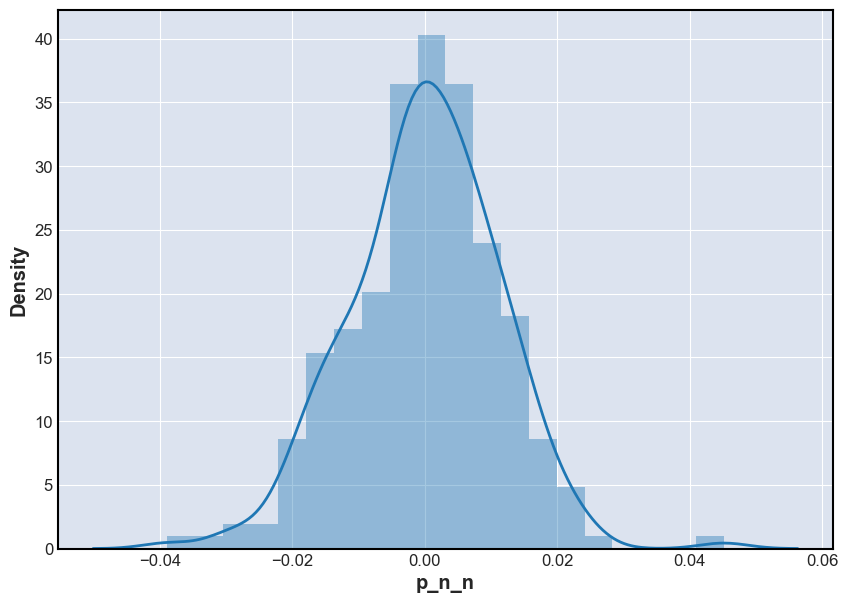

In [26]:
# Para precio_al_n_negociaciones
s_6_2_df = pd.DataFrame(s_6_2)
fig, ax = plt.subplots(figsize = (10, 7))
ax = sns.distplot(s_6_2_df.p_n_n)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


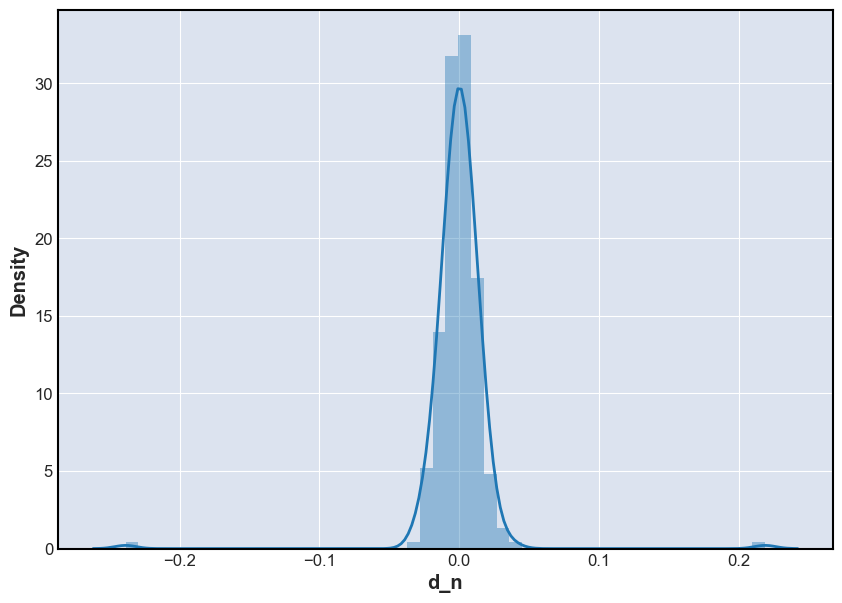

In [27]:
# Para dolares_negociados
s_6_3_df = pd.DataFrame(s_6_3)
fig, ax = plt.subplots(figsize = (10, 7))
ax = sns.distplot(s_6_3_df.d_n)

In [ ]:
# 7.2 Que diferencias observas? 
# Las tres están centradas a 0.
# La primera tiene una distribución mas amplia hasta [-0.6,0.6] sin 
# valores que se deban desechar.
# La segunda tiene una distribución entre las otras dos y se debería 
# evaluar que hacer con los valores fuera de la 
# distribución [-0.4,0.4].
# La tercera esta muy poco distribuida (muy concentrada) y se debería 
# evaluar los valores fuera de la distribución [-0.05,0.05].
# En el libro Advance in Financial Machine Learning se analiza 
# en los puntos 2.3.1.2 Tick Bars, 2.3.1.4 Dollar Bars muy claramente.

In [ ]:
##################################################################################################################################################################

In [ ]:
# Ejercicio 4

In [ ]:
# 1
# Usando dollar bars, una funcion para cada muestra le pongo una etiqueta (-1,0,1) 
# dependiendo de lo que toque antes.
# 0 barrera final
# 1 barrera superior
# -1 barrera inferior

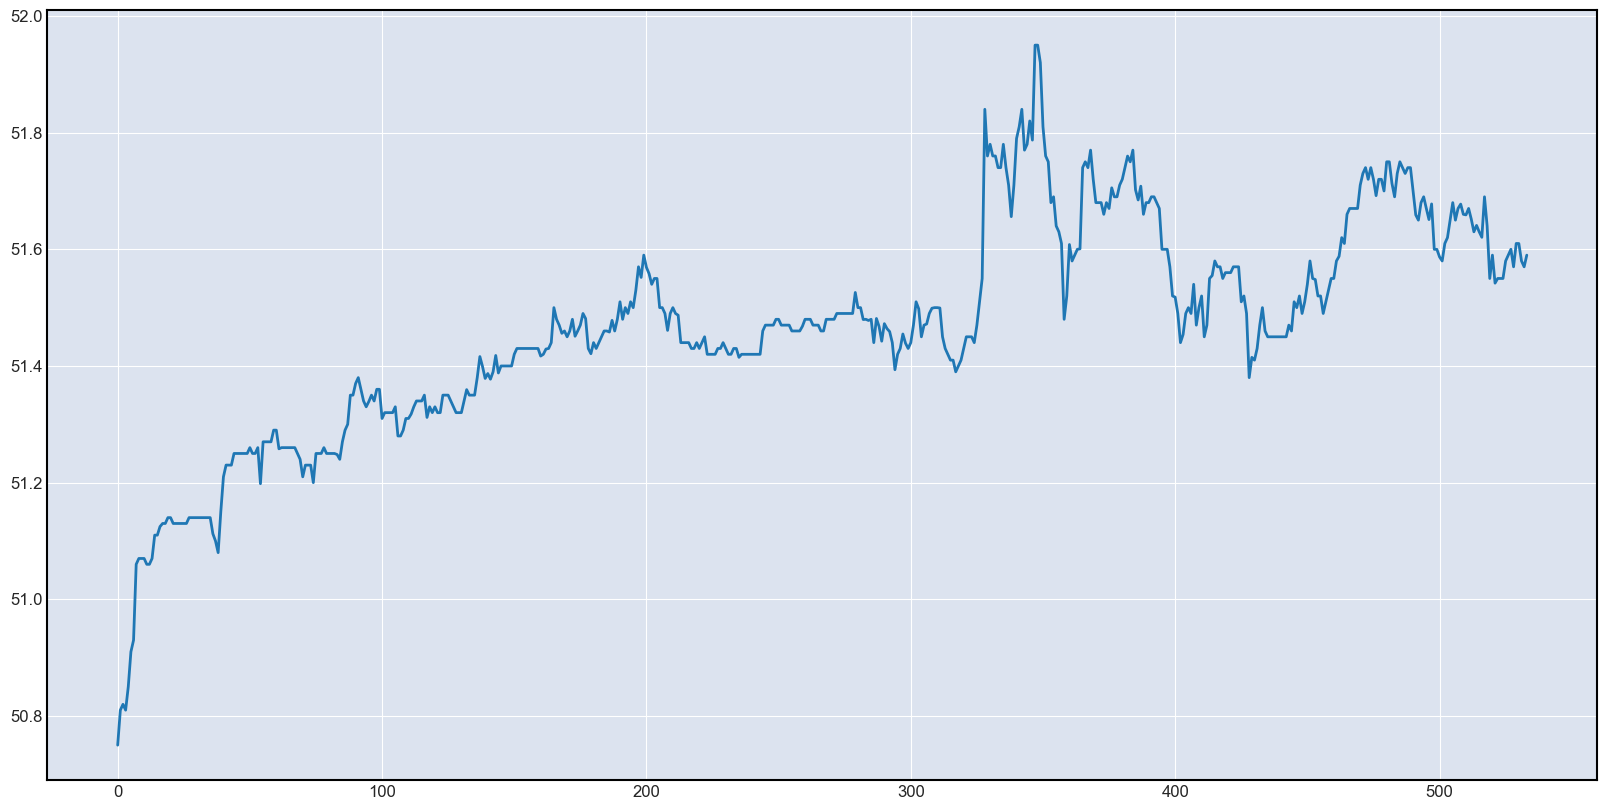

In [28]:
#1.1.1 Función anterior dollar bars

def dolares_negociados(n_dolares_negociados,cuantas_negociaciones):
    salida = pd.Series(range(cuantas_negociaciones))
    ac = 0    
    lista_db = list()
    for i in range(cuantas_negociaciones):
        ac = ac + df_5.precio.iloc[i] * df_5.volumen.iloc[i]
        if ac > n_dolares_negociados:
            ac = 0
            lista_db.append(df_5.precio.iloc[i])
        salida[i] = ac   
    return salida , lista_db

salida , lista_db = dolares_negociados(100000,5000)  

fig, ax = plt.subplots(figsize = (20,10))
ax.plot(lista_db)
# sale una grafica de 534 puntos. Creo que es suficiente para el estudio

In [29]:
#1.1.2 hago la función del enunciado
def tri_barrier_method(lista_valores,valor_delta_superior_porc,
    valor_delta_inferior_porc,max_tiempo):
   
#inicializo variables para que sear los puntos maximo y minimo
    valor_delta_superior = np.zeros(len(lista_valores))
    valor_delta_inferior = np.zeros(len(lista_valores))
    salida = np.zeros(len(lista_valores))
    
    for i in range(len(lista_valores)):

        valor_delta_superior[i] = lista_valores[i] + (lista_valores[i] * 
            valor_delta_superior_porc / 100)
        valor_delta_inferior[i] = lista_valores[i] - (lista_valores[i] * 
            valor_delta_inferior_porc / 100)
 
        for j in range(max_tiempo):
            if len(lista_valores) > i + j:
                if lista_valores[i + j] > valor_delta_superior[i]:
                    salida[i] = 1
                if lista_valores[i + j] < valor_delta_inferior[i]:
                    salida[i] = -1  
            else:
                break
    return salida

salida = tri_barrier_method(lista_db,0.3,0.3,50)  
salida

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0

In [ ]:
#1.2 Busca la manera de optener lo mas balanceado posible que se aproxime a 33% todas las etiquetas
# variable 1 = dolares_negociados. Empiezo con 100000
# variable 2 = numero maximo de ticks considerados. Empiezo con 5000
# variable 3 = tiempo maximo de correr la funcion
# variable 4 = valor delta superior
# variable 5 = valor deta inferior

In [30]:
# 1.2.1
# Segun lo que explica el profesor, solo tengo que ver combinaciones de 
# las variables tiempo maximo de 
# correr la funcion, valor delta superior y valor deta inferior
# Saco 3 numeros para tiempo maximo, valor delta superior y valor deta inferior
# tiempo maximo seria desde p.ej 100 al 400
# valor delta superior seria desde 0.3 a 1.5
# valor delta inferior seria desde 0.1 a 1.3

# Creo una lista que de 3 valores en 3 valores esta listado todas las combinaciones 
# de t_max, des_sup y des_inf
data = {'t_max': ['100', '125', '150', '175','200', '225', '250', '275', 
    '300', '325', '350', '375', '400'],
        'des_sup': ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1', 
    '1.1', '1.2', '1.3','1.4', '1.5'],
        'des_inf': [ '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', 
    '0.9', '1', '1.1',' 1.2','1.3']}
frame = pd.DataFrame(data)
lista = list()
t_max_s = 0
des_sup_s = 0
des_inf_s =  0
for i in range(len(frame.t_max)):
    for j in range(len(frame.des_sup)):
        for k in range(len(frame.des_inf)):
            t_max_s = frame.t_max[i]
            des_sup_s = frame.des_sup[j]
            des_inf_s =  frame.des_inf[k]
            lista.append(t_max_s)
            lista.append(des_sup_s)
            lista.append(des_inf_s)
lista 


['100',
 '0.3',
 '0.1',
 '100',
 '0.3',
 '0.2',
 '100',
 '0.3',
 '0.3',
 '100',
 '0.3',
 '0.4',
 '100',
 '0.3',
 '0.5',
 '100',
 '0.3',
 '0.6',
 '100',
 '0.3',
 '0.7',
 '100',
 '0.3',
 '0.8',
 '100',
 '0.3',
 '0.9',
 '100',
 '0.3',
 '1',
 '100',
 '0.3',
 '1.1',
 '100',
 '0.3',
 ' 1.2',
 '100',
 '0.3',
 '1.3',
 '100',
 '0.4',
 '0.1',
 '100',
 '0.4',
 '0.2',
 '100',
 '0.4',
 '0.3',
 '100',
 '0.4',
 '0.4',
 '100',
 '0.4',
 '0.5',
 '100',
 '0.4',
 '0.6',
 '100',
 '0.4',
 '0.7',
 '100',
 '0.4',
 '0.8',
 '100',
 '0.4',
 '0.9',
 '100',
 '0.4',
 '1',
 '100',
 '0.4',
 '1.1',
 '100',
 '0.4',
 ' 1.2',
 '100',
 '0.4',
 '1.3',
 '100',
 '0.5',
 '0.1',
 '100',
 '0.5',
 '0.2',
 '100',
 '0.5',
 '0.3',
 '100',
 '0.5',
 '0.4',
 '100',
 '0.5',
 '0.5',
 '100',
 '0.5',
 '0.6',
 '100',
 '0.5',
 '0.7',
 '100',
 '0.5',
 '0.8',
 '100',
 '0.5',
 '0.9',
 '100',
 '0.5',
 '1',
 '100',
 '0.5',
 '1.1',
 '100',
 '0.5',
 ' 1.2',
 '100',
 '0.5',
 '1.3',
 '100',
 '0.6',
 '0.1',
 '100',
 '0.6',
 '0.2',
 '100',
 '0.6',
 '0

In [31]:
# 1.2.2
# Hago una función que mire cuanto alejado esta la cantidad de 1s,-1s y 0s 
# del 33% de 534 (total de muestras de esa grafica (len(salida));
# y la que de un valor menor sera la mas optima de las soluciones
def distancia_33(salida):    
    n_ceros = len(salida[salida == 0])
    n_unos = len(salida[salida == 1])
    n_menos_unos = len(salida[salida == 1])
    n_33 = len(lista_db) / 3
    resultado = ((n_ceros - n_33) ** 2) + ((n_unos - n_33) ** 2) + ((n_menos_unos - n_33) ** 2)
    return resultado

# Otra alternativa es ver la diferencia de numeros de veces que sale ceros, 
# unos y menos unos entre ellos y elegir el que tenga menos diferencia

def diferencia_01menos1(salida):
    n_ceros = len(salida[salida == 0])
    n_unos = len(salida[salida == 1])
    n_menos_unos = len(salida[salida == 1])
    resultado = ((n_ceros - n_unos) ** 2) + ((n_ceros - n_menos_unos) ** 2) + ((n_unos - n_menos_unos) ** 2)
    return resultado



In [32]:
# 1.2.3.1
# Itero  lista con tri_barrier_method y al resultado le aplico funcion distancia_33 
# y miro que combinación de tiempo máximo de correr la función,
# valor delta superior y valor delta inferior tiene mejor distancia a 33% de 
# los 3 valores. Guardo todos los valores en list_resultado
list_resultado = list()
distancias = list()
for i in range(0,len(lista),3):
    #print(int(lista[i]),",",int(lista[i+1]),",",int(lista[i+2]))
    salida = tri_barrier_method(lista_db,float(lista[i + 1]),
    float(lista[i + 2]),int(lista[i]))
    distancia = distancia_33(salida)
    list_resultado.append(lista[i])
    list_resultado.append(lista[i + 1])
    list_resultado.append(lista[i + 2])
    list_resultado.append(distancia)
    distancias.append(distancia)

print('Resultado comparando desviaciones minimas al 33% del numero de operaciones')
print('Posicion en lista de optimos parametros es :', list_resultado.index(min(distancias)))
print('La combinacion optima observada es')
print('Con un delta inferior de ', list_resultado[(list_resultado.index(min(distancias))) - 1])
print('Con un delta superior de ', list_resultado[(list_resultado.index(min(distancias))) - 2])
print('Con un tiempo maximo de ', list_resultado[(list_resultado.index(min(distancias))) - 3])

salida = tri_barrier_method(lista_db,
                            float(list_resultado[(list_resultado.index(min(distancias))) - 1]),
                            float(list_resultado[(list_resultado.index(min(distancias))) - 2]),
                            int(list_resultado[(list_resultado.index(min(distancias))) - 3]))
print('Con numero de ceros ', len(salida[salida == 0]) )
print('Con numero de unos ', len(salida[salida == 1]) )
print('Con numero de menos unos ', len(salida[salida == -1]) )
print('con valor de minima distancia al 33% de tiradas de', min(distancias)) 


Resultado comparando desviaciones minimas al 33% del numero de operaciones
Posicion en lista de optimos parametros es : 5779
La combinacion optima observada es
Con un delta inferior de  0.2
Con un delta superior de  1
Con un tiempo maximo de  300
Con numero de ceros  102
Con numero de unos  429
Con numero de menos unos  3
con valor de minima distancia al 33% de tiradas de 262.0


In [33]:
# 1.2.3.2
# Alternativa con al función diferencia_01menos1
# Otra alternativa es ver la diferencia de números de veces que sale ceros, 
#unos y menos unos entre ellos y elegir el que tenga menos diferencia


list_resultado = list()
distancias = list()
for i in range(0,len(lista),3):
    #print(int(lista[i]),",",int(lista[i+1]),",",int(lista[i+2]))
    salida = tri_barrier_method(lista_db,float(lista[i+1]),float(lista[i+2]),int(lista[i]))
    distancia = diferencia_01menos1(salida)
    list_resultado.append(lista[i])
    list_resultado.append(lista[i+1])
    list_resultado.append(lista[i+2])
    list_resultado.append(distancia)
    distancias.append(distancia)


print('Resultado comparando desviaciones minimas cada suma de ceros, unos y menos unos con los otros para todas las operaciones')
print('Posicion en lista de optimos parametros es :', list_resultado.index(min(distancias)))
print('La combinacion optima observada es')
print('Con un delta inferior de ', list_resultado[(list_resultado.index(min(distancias)))-1])
print('Con un delta superior de ', list_resultado[(list_resultado.index(min(distancias)))-2])
print('Con un tiempo maximo de ', list_resultado[(list_resultado.index(min(distancias)))-3])

salida = tri_barrier_method(lista_db,
                            float(list_resultado[(list_resultado.index(min(distancias)))-1]),
                            float(list_resultado[(list_resultado.index(min(distancias)))-2]),
                            int(list_resultado[(list_resultado.index(min(distancias)))-3]))
print('Con numero de ceros ', len(salida[salida == 0]) )
print('Con numero de unos ', len(salida[salida == 1]) )
print('Con numero de menos unos ', len(salida[salida == -1]) )
print('con valor de minima distancia entre valores es', min(distancias)) 

Resultado comparando desviaciones minimas cada suma de ceros, unos y menos unos con los otros para todas las operaciones
Posicion en lista de optimos parametros es : 3667
La combinacion optima observada es
Con un delta inferior de  0.7
Con un delta superior de  0.8
Con un tiempo maximo de  225
Con numero de ceros  252
Con numero de unos  274
Con numero de menos unos  8
con valor de minima distancia entre valores es 0
